<a href="https://colab.research.google.com/github/itssofiarce/sagrada/blob/main/codigo/analisis_postextraccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Analisis y visualizaciones de los datos.

In [1]:
# Clono el repo en mi entorno de colab

import os

REPO_NAME = "sagrada"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/GrimaldiDamian/{REPO_NAME}.git
  os.chdir(REPO_NAME)


Cloning into 'sagrada'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 101 (delta 23), reused 18 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (101/101), 7.98 MiB | 8.94 MiB/s, done.
Resolving deltas: 100% (23/23), done.


# Analisis de estadísticas

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv

# Leer CSV usando el módulo csv que maneja bien las comillas
with open("/content/sagrada/datos/estadisticas/estadisticas.csv", encoding="utf-8") as f:
    reader = csv.reader(f)
    rows = list(reader)

In [30]:
from pprint import pprint

# Obtener encabezados
column_names = rows[0]

# Inicializar diccionario por columna
column_data = {col: [] for col in column_names}

# Llenar columnas con sus respectivas celdas
for row in rows[1:]:
    for i, cell in enumerate(row):
        if i < len(column_names):
            column_data[column_names[i]].append(cell.strip())

# Convertir a lista de diccionarios
final_result = [{col: vals} for col, vals in column_data.items()]


In [31]:
# Función para extraer métrica y valor numérico
def extraer_metrica_valor(texto):
    texto = re.sub(r'Find.*', '', texto).strip()  # quitar texto adicional
    match = re.match(r'([A-Za-z .\/]+?)\s+([\d,\.]+)', texto)
    if match:
        metrica = match.group(1).strip()
        valor_str = match.group(2).replace(",", "")
        try:
            valor = float(valor_str)
            if valor.is_integer():
                valor = int(valor)
            return metrica, valor
        except ValueError:
            pass
    return None, None


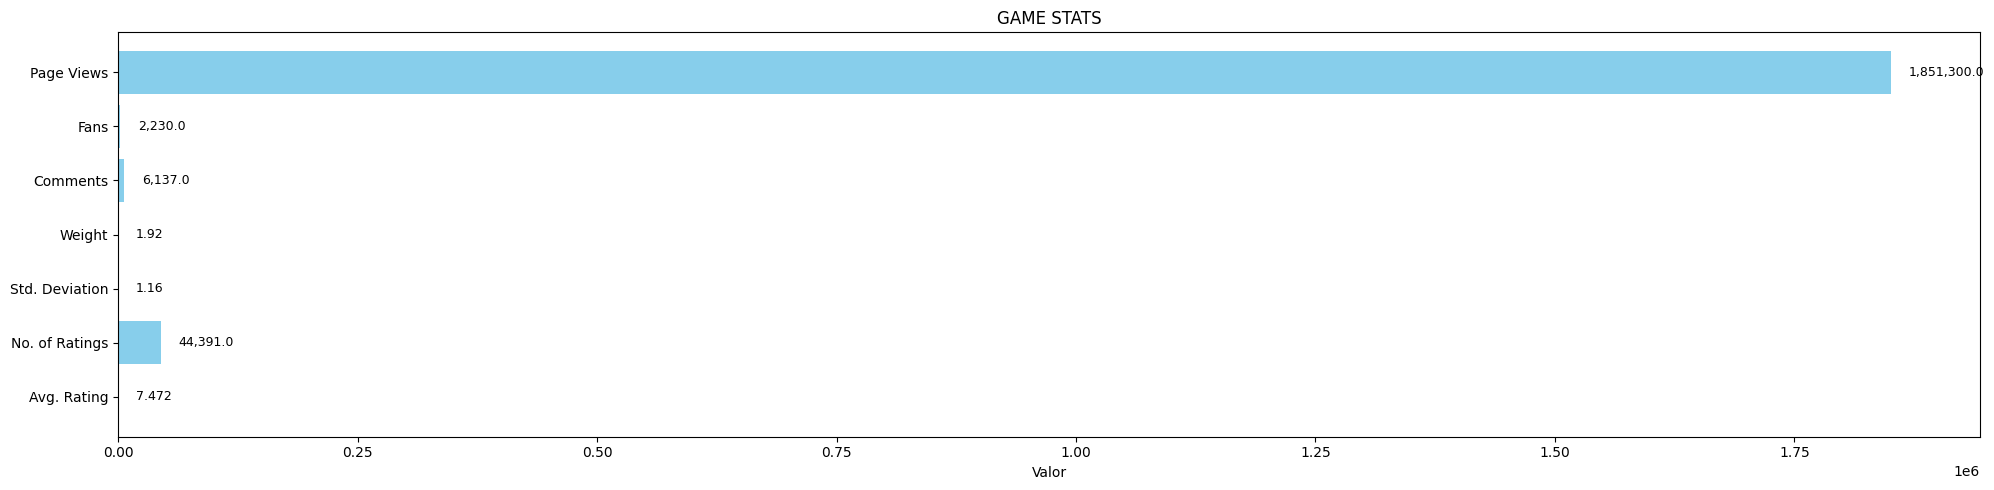

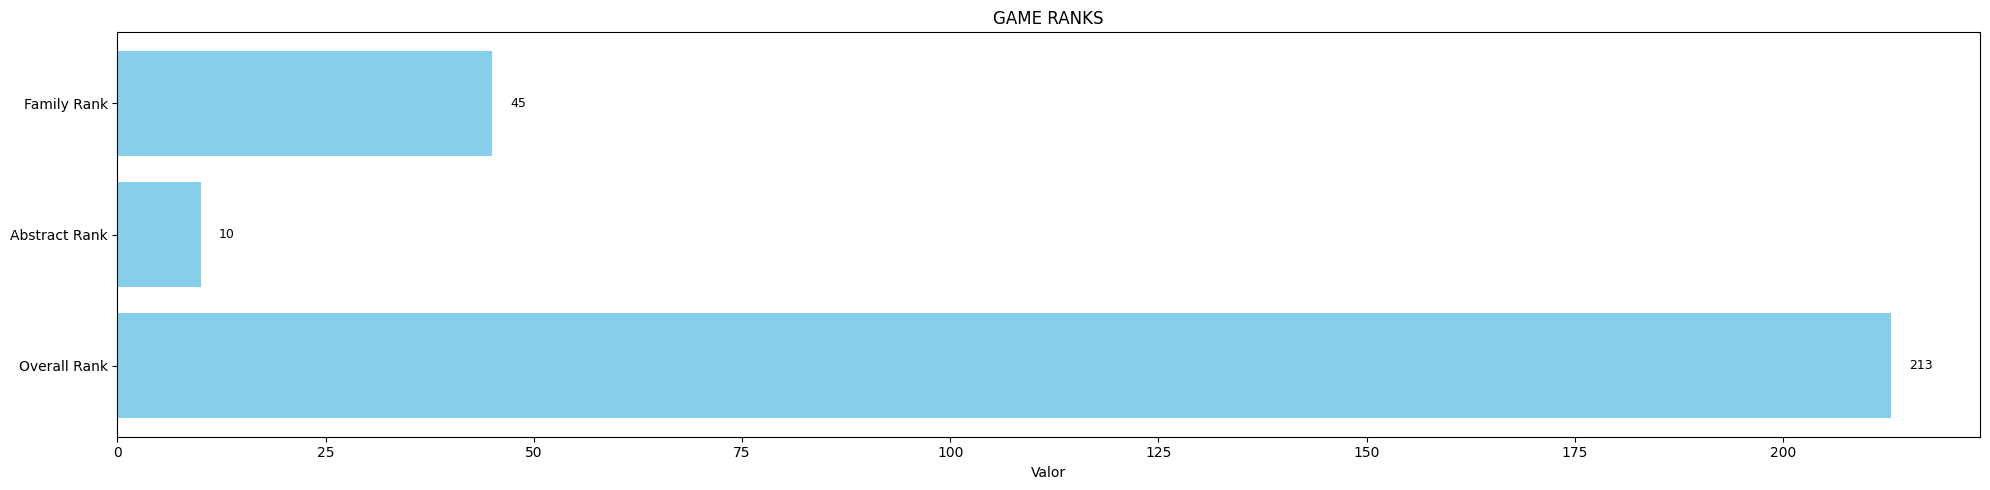

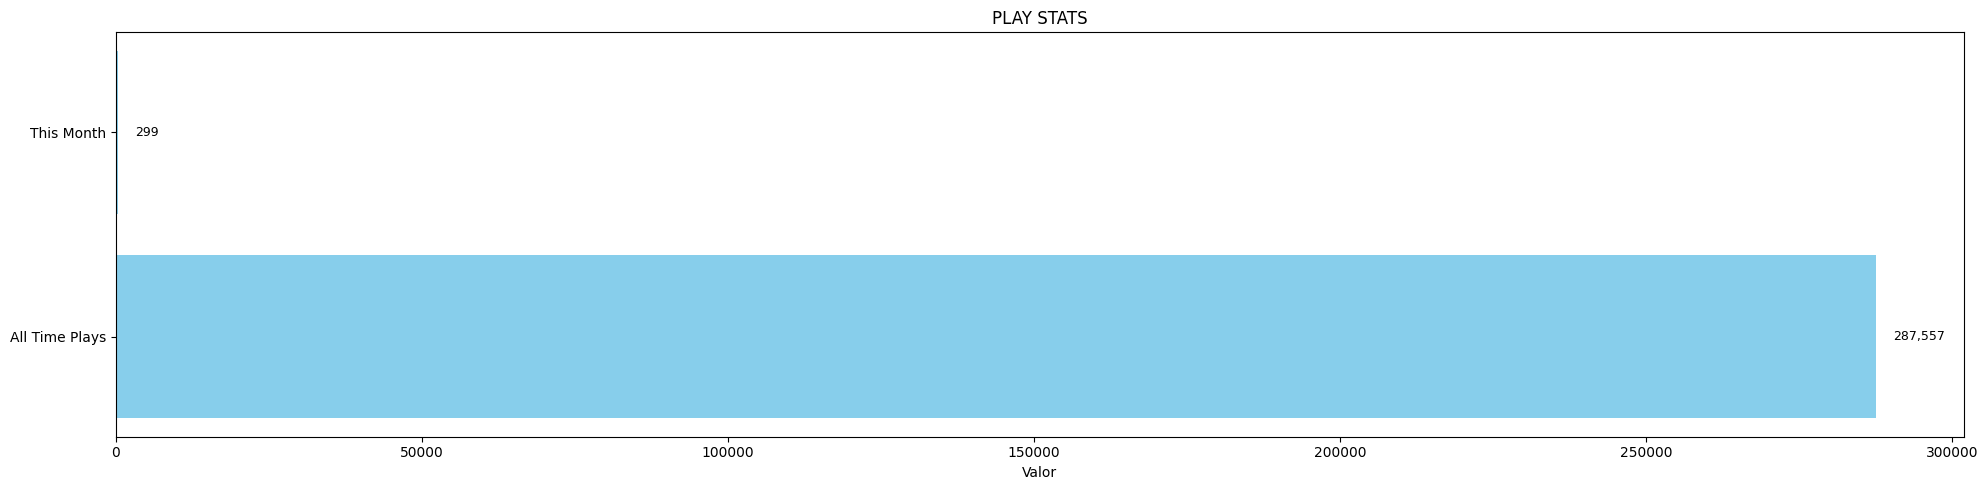

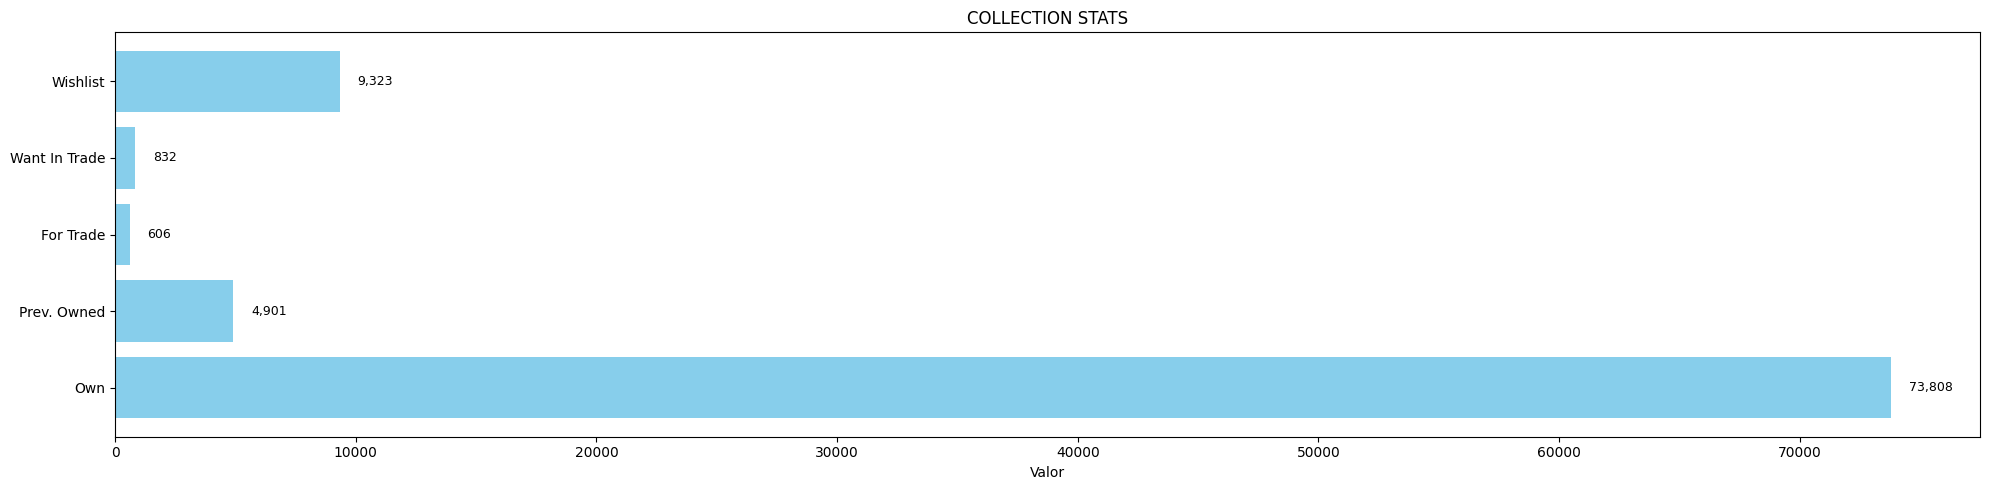

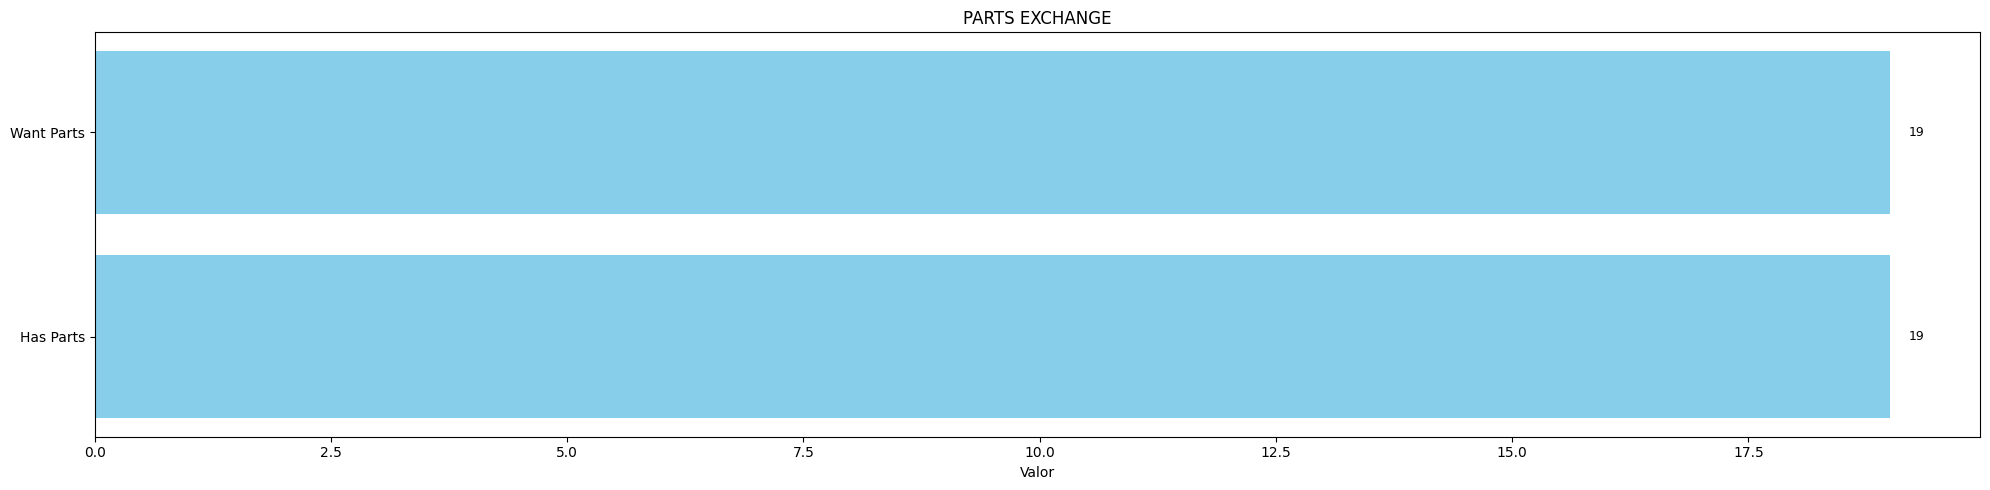

In [37]:
# Recorrer cada sección y graficar
for seccion in final_result:
    for nombre_seccion, valores in seccion.items():
        metricas = []
        valores_numericos = []
        for entrada in valores:
            if not entrada.strip():
                continue
            metrica, valor = extraer_metrica_valor(entrada)
            if metrica and valor is not None:
                metricas.append(metrica)
                valores_numericos.append(valor)

        # Si hay datos válidos, graficar
        if metricas:
            plt.figure(figsize=(20, 5))
            bars = plt.barh(metricas, valores_numericos, color="skyblue")
            plt.xlabel("Valor")
            plt.title(nombre_seccion)
            plt.tight_layout()

            # Add value labels to bars
            for bar in bars:
                width = bar.get_width()
                # Add label slightly to the right of the bar
                plt.text(width + max(valores_numericos)*0.01,  # a bit to the right
                         bar.get_y() + bar.get_height()/2,
                         f"{width:,}",  # formatted with commas
                         va='center', fontsize=9)

            plt.show()


# Análisis de información


In [59]:
def contador_caracteres_total(texto, path_to_text):

  with open(f"{path_to_text}", 'r', encoding='utf-8') as file:
    texto_abierto = file.read()

  # Contar la cantidad de caracteres
  num_caracteres = len(texto_abierto)
  print(f"Número total de caracteres de los {texto} transcriptos:", num_caracteres)

In [70]:
def contador_palabras_frecuentes(texto, path_to_text,num):

  with open(f"{path_to_text}", 'r', encoding='utf-8') as file:
    texto_abierto = file.read()

  from collections import Counter

  # Limpiamos el texto: eliminar puntuaciones, convertir todo a minúsculas
  texto_limpio = re.sub(r'[^\w\s]', '', texto_abierto.lower())

  # Nos quedamos con aquellas palabras que tengan mas de tres letras
  palabras_filtradas = [palabra for palabra in texto_limpio.split() if len(palabra) > num]

  # Contamos la frecuencia de todas las palabras y mostramos las 10 primeras
  frecuencia_palabras = Counter(palabras_filtradas).most_common(10)

  palabras, frecuencias = zip(*frecuencia_palabras)  # `zip(*data)` separa las tuplas en dos listas

  # Crear gráfico de barras verticales
  plt.figure(figsize=(10, 6))
  plt.bar(palabras, frecuencias, color='green')

  # Añadir título y etiquetas
  plt.title(f'Frecuencia de Palabras Más Comunes Con mas de {num} caracteres en {texto}', fontsize=14)
  plt.xlabel('Palabra', fontsize=12)
  plt.ylabel('Frecuencia', fontsize=12)

  # Ajustar el tamaño y mostrar el gráfico
  plt.xticks(rotation=45)  # Rotar las etiquetas de las palabras para mejor visualización
  plt.tight_layout()
  plt.show()

In [60]:
contador_caracteres_total("pdfs", "/content/sagrada/datos/informacion/pdfs_transcriptos.txt")

Número total de caracteres de los pdfs transcriptos: 27394


In [76]:
contador_caracteres_total("transcripciondes de videos", "/content/sagrada/datos/informacion/videos_transcriptos.txt")

Número total de caracteres de los transcripciondes devideos transcriptos: 375826


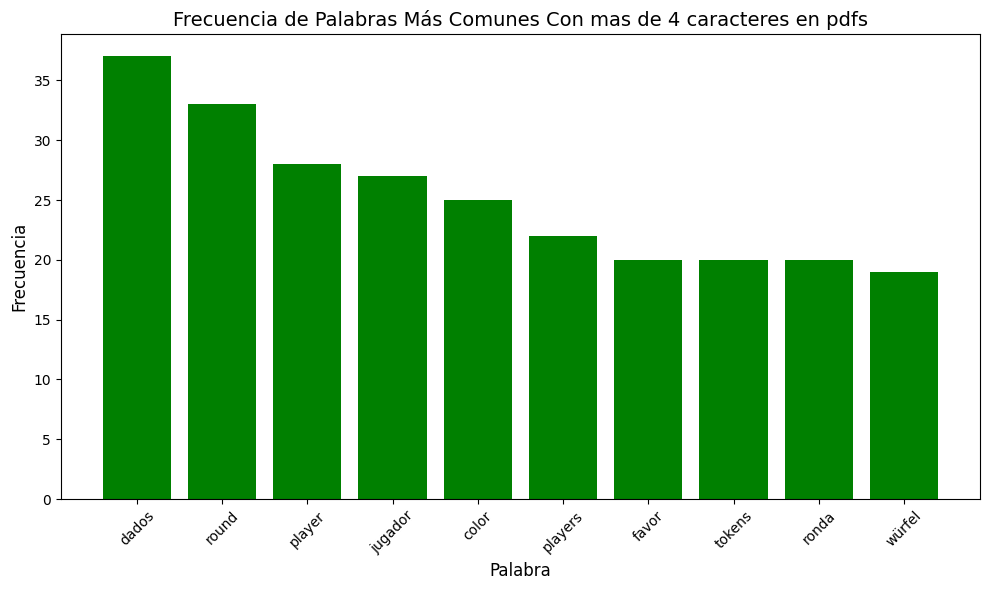

In [72]:
contador_palabras_frecuentes("pdfs", "/content/sagrada/datos/informacion/pdfs_transcriptos.txt",4)

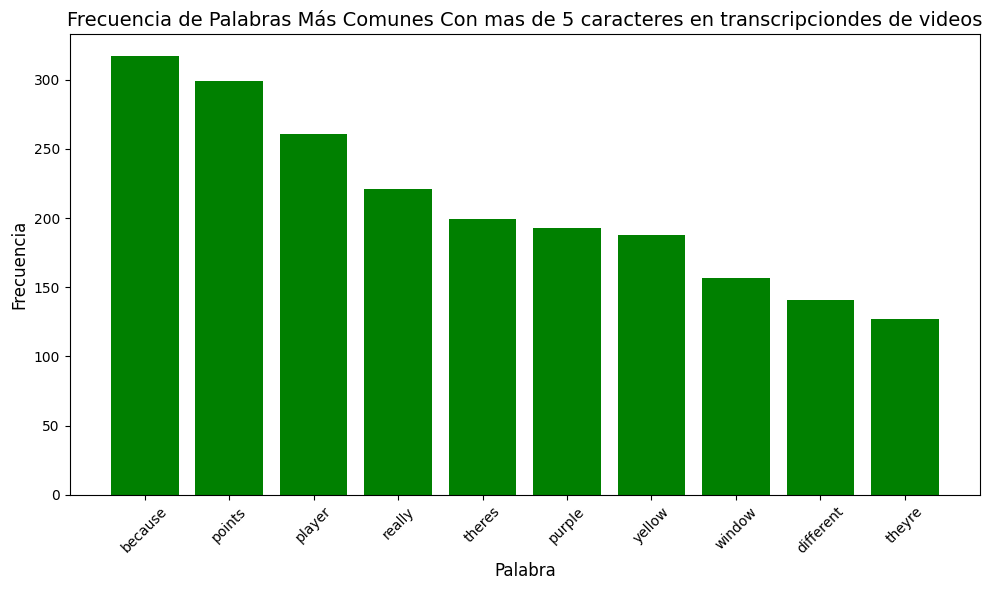

In [77]:
contador_palabras_frecuentes("transcripciondes de videos", "/content/sagrada/datos/informacion/videos_transcriptos.txt",5)

# Análisis de Relaciones